Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [X] Choose your target. Which column in your tabular dataset will you predict?
- [X] Is your problem regression or classification?
- [X] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [X] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [X] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [X] Begin to clean and explore your data.
- [X] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

In [2]:
# Imports & df creation
import pandas as pd
import numpy as np

potholes = pd.read_csv('../../Unit 2 Build Week/Pothole Requests after 10.15.18.csv')

In [25]:
# Adjust pandas display settings to view all data
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

# Look at data
print(potholes.shape)
potholes.head()

(19582, 30)


,CASE ID,SOURCE,DEPARTMENT,WORK GROUP,REQUEST TYPE,CATEGORY,TYPE,DETAIL,CREATION DATE,CREATION TIME,CREATION MONTH,CREATION YEAR,STATUS,EXCEEDED EST TIMEFRAME,CLOSED DATE,CLOSED MONTH,CLOSED YEAR,DAYS TO CLOSE,STREET ADDRESS,ADDRESS WITH GEOCODE,ZIP CODE,NEIGHBORHOOD,COUNTY,COUNCIL DISTRICT,POLICE DISTRICT,PARCEL ID NO,LATITUDE,LONGITUDE,CASE URL,30-60-90 Days Open Window
0,2019169222,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,09/20/2019,01:31 PM,9,2019,RESOL,Y,11/07/2019,11.0,2019.0,48.0,13110 E 57th St,"13110 E 57th St64133\n(39.018605, -94.426046)",64133,Blue Vue Hills,Jackson,5,East,63787,39.018605,-94.426046,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
1,2019126105,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,07/03/2019,08:30 AM,7,2019,RESOL,Y,10/24/2019,10.0,2019.0,113.0,1420 E 75th Ter,"1420 E 75th Ter64131\n(38.990601, -94.570141)",64131,East Meyer 6,Jackson,5,Metro,115894,38.990601,-94.570141,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
2,2019126468,WEB,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,07/03/2019,01:53 PM,7,2019,RESOL,Y,10/24/2019,10.0,2019.0,113.0,5500 Michigan Ave,"5500 Michigan Ave64130\n(39.026622, -94.563667)",64130,Blue Hills,Jackson,5,Metro,147750,39.026622,-94.563667,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
3,2019183619,PHONE,Public Works,Public Works-Street and Traffic-District 1,Streets / Roadways / Alleys-Pothole-District 1,Streets / Roadways / Alleys,Pothole,District 1,10/23/2019,09:36 AM,10,2019,RESOL,Y,11/22/2019,11.0,2019.0,30.0,6344 NE Pleasant Valley Rd,"6344 NE Pleasant Valley Rd64119\n(39.216929, -...",64119,Shoal Creek,Clay,1,Shoal Creek,89139,39.216929,-94.504961,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
4,2019190590,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,11/08/2019,10:27 AM,11,2019,RESOL,Y,11/18/2019,11.0,2019.0,10.0,9500 Blue Ridge Blvd,"9500 Blue Ridge Blvd64134\n(38.952042, -94.508...",64134,Fairlane,Jackson,5,South,56861,38.952042,-94.508463,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN


For my project, I will create a model which predicts the amount of time it
takes a pothole to be filled in Kansas City, and I will select "DAYS TO CLOSE"
as my target column to do so. 

Since the target column contains a continuous variable, this is a 
regression problem. 

In [9]:
# Look at target column
potholes['DAYS TO CLOSE'].describe()


count    19161.000000
mean        38.967695
std         36.931906
min          0.000000
25%          9.000000
50%         27.000000
75%         61.000000
max        240.000000
Name: DAYS TO CLOSE, dtype: float64

In [10]:
# Look at empty values in target column
potholes['DAYS TO CLOSE'].isna().sum()

421

In [33]:
# Look at null values
potholes[potholes['DAYS TO CLOSE'].isna()].head()

,CASE ID,SOURCE,DEPARTMENT,WORK GROUP,REQUEST TYPE,CATEGORY,TYPE,DETAIL,CREATION DATE,CREATION TIME,CREATION MONTH,CREATION YEAR,STATUS,EXCEEDED EST TIMEFRAME,CLOSED DATE,CLOSED MONTH,CLOSED YEAR,DAYS TO CLOSE,STREET ADDRESS,ADDRESS WITH GEOCODE,ZIP CODE,NEIGHBORHOOD,COUNTY,COUNCIL DISTRICT,POLICE DISTRICT,PARCEL ID NO,LATITUDE,LONGITUDE,CASE URL,30-60-90 Days Open Window
7,2019181063,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,10/16/2019,06:21 PM,10,2019,OPEN,N,NaN,NaN,NaN,NaN,7916 Olive St,"7916 Olive St64132\n(38.982993, -94.560287)",64132,Marlborough Heights/Marlborough Pride,Jackson,5,Metro,116978,38.982993,-94.560287,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,0.0
10,2019192940,WEB,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,11/15/2019,10:34 AM,11,2019,OPEN,N,NaN,NaN,NaN,NaN,12100 E 65th Ct,"12100 E 65th Ct64133\n(39.004765, -94.439185)",64133,Timber Valley,Jackson,5,East,65027,39.004765,-94.439185,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,0.0
14,2019182639,WEB,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,10/21/2019,04:07 PM,10,2019,OPEN,Y,NaN,NaN,NaN,NaN,3801 E 73rd St,"3801 E 73rd St64132\n(38.993528, -94.542807)",64132,Noble And Gregory Ridge,Jackson,5,Metro,4327,38.993528,-94.542807,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,0.0
29,2019183332,WEB,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,10/22/2019,04:20 PM,10,2019,OPEN,Y,NaN,NaN,NaN,NaN,6120 Paseo,"6120 Paseo64110\n(39.015727, -94.571)",64110,Eastern 49-63,Jackson,5,Metro,105164,39.015727,-94.571000,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,0.0
34,2019181037,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,10/16/2019,05:26 PM,10,2019,OPEN,Y,NaN,NaN,NaN,NaN,1237 W 69th Ter,"1237 W 69th Ter64113\n(39.003269, -94.607158)",64113,Romanelli West,Jackson,6,Metro,110229,39.003269,-94.607158,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,0.0


In [31]:
# Look at types of Statuses
potholes['STATUS'].value_counts()

RESOL    19084
OPEN       419
DUP         77
CANC         2
Name: STATUS, dtype: int64

In [32]:
# Look at cancelled requests
potholes[potholes['STATUS'] == 'CANC']

,CASE ID,SOURCE,DEPARTMENT,WORK GROUP,REQUEST TYPE,CATEGORY,TYPE,DETAIL,CREATION DATE,CREATION TIME,CREATION MONTH,CREATION YEAR,STATUS,EXCEEDED EST TIMEFRAME,CLOSED DATE,CLOSED MONTH,CLOSED YEAR,DAYS TO CLOSE,STREET ADDRESS,ADDRESS WITH GEOCODE,ZIP CODE,NEIGHBORHOOD,COUNTY,COUNCIL DISTRICT,POLICE DISTRICT,PARCEL ID NO,LATITUDE,LONGITUDE,CASE URL,30-60-90 Days Open Window
11088,2019074290,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,04/16/2019,03:40 PM,4,2019,CANC,N,09/30/2019,NaN,NaN,NaN,11430 Wornall Rd,"11430 Wornall Rd64114\n(38.920625, -94.59389)",64114,Foxcroft And Glen Arbor,Jackson,6,South,155391,38.920625,-94.59389,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
16055,2019099893,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,05/23/2019,12:16 PM,5,2019,CANC,N,09/30/2019,NaN,NaN,NaN,5455 Paseo,"5455 Paseo64110\n(39.027136, -94.56709)",64110,Blue Hills,Jackson,5,Metro,146710,39.027136,-94.56709,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN


In [137]:
# Drop all null target values -- which consist of OPEN & CANC status entries
potholes_open = potholes.dropna(subset=['DAYS TO CLOSE'])

In [54]:
potholes_open['STATUS'].value_counts()

RESOL    19084
DUP         77
Name: STATUS, dtype: int64

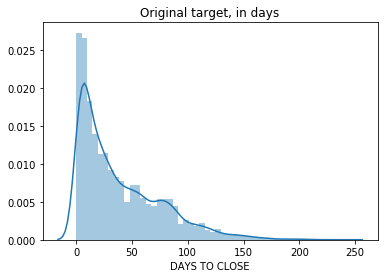

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define target
y = potholes_open['DAYS TO CLOSE']

# Plot distribution of target
sns.distplot(y)
plt.title('Original target, in days');

**Since my target is right-skewed, I will log transform the data for
more accurate modeling.**

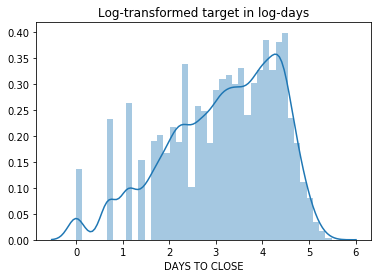

In [63]:
# Log transform target for more even distribution
y_log = np.log1p(y)

sns.distplot(y_log)
plt.title('Log-transformed target in log-days');

**The evaluation metrics I will use will be:**

Mean Absolute Error (MAE) (so as not to overpenalize outliers)

and

R^2 (to determine improvement from baseline)


**The observations I will use to train, validate, and test my data will be:**

train: Oct. 2018 - June 2018

validation: June - August 2019

test: August - October 2019

I will split the data in a time-based manner since the data varies greatly by date, and I do not want to end up with an overly optimistic model that will not translate well with new data in the future. 

***Data Exploration***

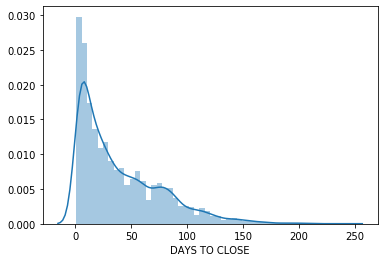

In [79]:
# Look at data without rows closed after 0 days
y_2 = potholes_open[potholes_open['DAYS TO CLOSE'] > 0]['DAYS TO CLOSE']
sns.distplot(y_2);

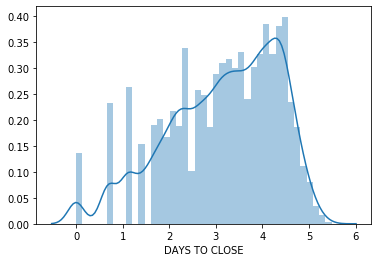

In [80]:
# Look at log transformed distribution for data without 0-day closes
y_2_log = np.log1p(y)
sns.distplot(y_2_log);

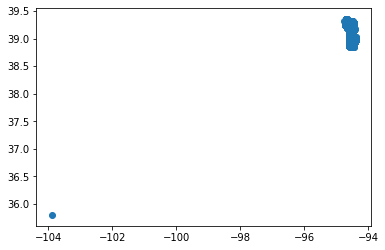

In [82]:
# Visualize latitude & longitude data
plt.scatter(x=potholes_open['LONGITUDE'], y=potholes_open['LATITUDE']);

In [83]:
# Look at data to determine status of latitude & longitude outliers
potholes_open.describe()

,CASE ID,CREATION MONTH,CREATION YEAR,CLOSED MONTH,CLOSED YEAR,DAYS TO CLOSE,ZIP CODE,COUNCIL DISTRICT,PARCEL ID NO,LATITUDE,LONGITUDE,30-60-90 Days Open Window
count,1.916100e+04,19161.000000,19161.000000,19161.000000,19161.000000,19161.000000,19161.000000,19161.000000,19161.000000,19161.000000,19161.000000,0.0
mean,2.019051e+09,4.820312,2018.963885,6.072282,2018.966651,38.967695,64127.521737,4.201086,119434.120871,39.054452,-94.560313,NaN
std,1.779860e+05,2.563274,0.186581,2.647121,0.179551,36.931906,15.192919,1.633135,66519.747667,0.112134,0.084897,NaN
min,2.018139e+09,1.000000,2018.000000,1.000000,2018.000000,0.000000,64030.000000,1.000000,7.000000,35.797519,-103.890579,NaN
25%,2.019049e+09,3.000000,2019.000000,4.000000,2019.000000,9.000000,64114.000000,3.000000,66829.000000,38.975791,-94.593992,NaN
50%,2.019078e+09,4.000000,2019.000000,6.000000,2019.000000,27.000000,64130.000000,5.000000,117042.000000,39.027000,-94.574131,NaN
75%,2.019110e+09,6.000000,2019.000000,8.000000,2019.000000,61.000000,64134.000000,6.000000,155268.000000,39.105145,-94.531630,NaN
max,2.019201e+09,12.000000,2019.000000,12.000000,2019.000000,240.000000,64167.000000,6.000000,282325.000000,39.353574,-94.386375,NaN


In [139]:
# Clearing outlier from dataset
potholes_open = potholes_open[potholes_open['LATITUDE'] > 38.8]

In [140]:
potholes_open['LATITUDE']

0        39.018605
1        38.990601
2        39.026622
3        39.216929
4        38.952042
           ...    
19577    39.093377
19578    39.022052
19579    38.934758
19580    39.090022
19581    39.288525
Name: LATITUDE, Length: 19160, dtype: float64

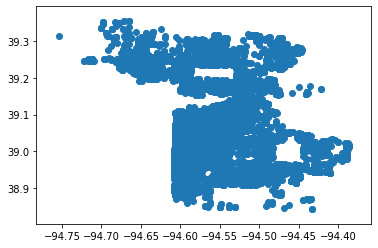

In [141]:
# Visualize latitude / longitude data
plt.scatter(x=potholes_open['LONGITUDE'], y=potholes_open['LATITUDE']);

In [144]:
# Create new dataframe with only rows that took > 0 days to close 
potholes_no_zeroes = potholes_open[potholes_open['DAYS TO CLOSE'] != 0]

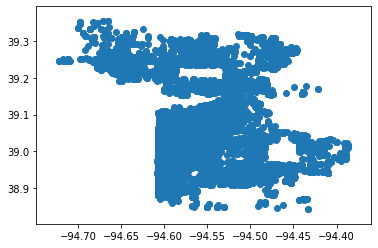

In [146]:
plt.scatter(x=potholes_no_zeroes['LONGITUDE'], 
            y=potholes_no_zeroes['LATITUDE']);

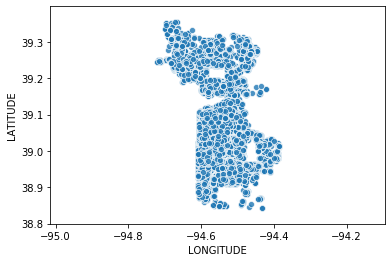

In [151]:
# Create new visualization with equal axes to more accurately visualize data
plt.axis('equal')
fig
sns.scatterplot(x=potholes_no_zeroes['LONGITUDE'], 
                y=potholes_no_zeroes['LATITUDE'], 
                alpha=.8, );

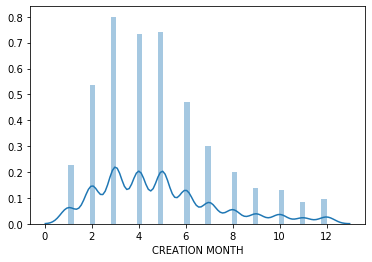

In [161]:
# Visualize distribution of reports by date
sns.distplot(potholes_no_zeroes['CREATION MONTH']);

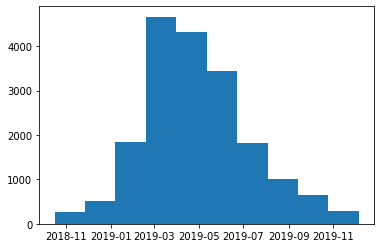

In [165]:
# Another visualization of reports by date
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.hist(pd.to_datetime(potholes_no_zeroes['CREATION DATE']));

In [171]:
potholes_no_zeroes.sort_values(by='DAYS TO CLOSE', ascending=False).head(100)

,CASE ID,SOURCE,DEPARTMENT,WORK GROUP,REQUEST TYPE,CATEGORY,TYPE,DETAIL,CREATION DATE,CREATION TIME,CREATION MONTH,CREATION YEAR,STATUS,EXCEEDED EST TIMEFRAME,CLOSED DATE,CLOSED MONTH,CLOSED YEAR,DAYS TO CLOSE,STREET ADDRESS,ADDRESS WITH GEOCODE,ZIP CODE,NEIGHBORHOOD,COUNTY,COUNCIL DISTRICT,POLICE DISTRICT,PARCEL ID NO,LATITUDE,LONGITUDE,CASE URL,30-60-90 Days Open Window
2689,2019021631,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,01/28/2019,11:42 AM,1,2019,RESOL,Y,09/25/2019,9.0,2019.0,240.0,6600 Broadmoor Rd,"6600 Broadmoor Rd64131\n(39.008065, -94.568178)",64131,Neighbors United For Action,Jackson,5,Metro,105455,39.008065,-94.568178,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
2456,2019023327,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,01/30/2019,12:31 PM,1,2019,RESOL,Y,09/25/2019,9.0,2019.0,238.0,5520 Topping Ave,"5520 Topping Ave64130\n(39.024424, -94.518597)",64130,Brown Estates,Jackson,5,Metro,38159,39.024424,-94.518597,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
504,2019045386,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,03/04/2019,03:05 PM,3,2019,RESOL,Y,10/18/2019,10.0,2019.0,228.0,7024 Ewing Ave,"7024 Ewing Ave64133\n(38.996275, -94.505881)",64133,Strupwood,Jackson,5,Metro,54970,38.996275,-94.505881,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
1644,2019081454,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,04/25/2019,06:22 PM,4,2019,RESOL,Y,12/06/2019,12.0,2019.0,225.0,7015 E 87th St,"7015 E 87th St64138\n(38.96657, -94.506999)",64138,Loma Vista,Jackson,5,South,55358,38.966570,-94.506999,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
1090,2019054013,PHONE,Public Works,Public Works-Street and Traffic-District 2,Streets / Roadways / Alleys-Pothole-District 2,Streets / Roadways / Alleys,Pothole,District 2,03/15/2019,04:19 PM,3,2019,RESOL,Y,10/24/2019,10.0,2019.0,223.0,14400 E 59th St,"14400 E 59th St64136\n(39.014039, -94.412291)",64136,Little Blue,Jackson,5,East,64184,39.014039,-94.412291,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
1091,2019054012,PHONE,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,03/15/2019,04:17 PM,3,2019,RESOL,Y,10/24/2019,10.0,2019.0,223.0,14700 E 59th St,"14700 E 59th St64136\n(39.014082, -94.40895)",64136,Little Blue,Jackson,5,East,64190,39.014082,-94.408950,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
4205,2019012194,WEB,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,01/22/2019,06:32 AM,1,2019,RESOL,Y,08/26/2019,8.0,2019.0,216.0,6751 Rickey Rd,"6751 Rickey Rd64133\n(38.997622, -94.433683)",64133,Little Blue,Jackson,5,East,65291,38.997622,-94.433683,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
929,2019076852,TWIR,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,04/19/2019,12:03 PM,4,2019,RESOL,Y,11/19/2019,11.0,2019.0,214.0,8707 E 74th Ter,"8707 E 74th Ter64133\n(38.98902, -94.484031)",64133,Park Farms,Jackson,5,Metro,53314,38.989020,-94.484031,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN
393,2019057890,EMAIL,Public Works,Public Works-Street and Traffic-District 3,Streets / Roadways / Alleys-Pothole-District 3,Streets / Roadways / Alleys,Pothole,District 3,03/21/2019,02:27 PM,3,2019,RESOL,Y,10/18/2019,10.0,2019.0,211.0,9104 E 47th St,"9104 E 47th St64133\n(39.035556, -94.473901)",64133,R